<a href="https://colab.research.google.com/github/DinhQuocTuan0108/Bai-tap/blob/main/MONEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/MONEY/

In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/MONEY/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 973 images belonging to 11 classes.


In [14]:
 # Tạo bộ dữ liệu validation
 validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/MONEY/VALIDATION',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 265 images belonging to 11 classes.


In [12]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [16]:
# Các nhãn có trong bộ dữ liệu validation
validation_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200D': 3,
 '200K': 4,
 '20K': 5,
 '2K': 6,
 '500D': 7,
 '500K': 8,
 '50K': 9,
 '5K': 10}

In [17]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [19]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
31/31 [==============================] - 163s 5s/step - loss: 2.4183 - accuracy: 0.1295 - val_loss: 2.3857 - val_accuracy: 0.1208
Epoch 2/500
31/31 [==============================] - 24s 792ms/step - loss: 2.3069 - accuracy: 0.1552 - val_loss: 2.4330 - val_accuracy: 0.1132
Epoch 3/500
31/31 [==============================] - 25s 796ms/step - loss: 2.2286 - accuracy: 0.1727 - val_loss: 2.9276 - val_accuracy: 0.1434
Epoch 4/500
31/31 [==============================] - 24s 778ms/step - loss: 2.1228 - accuracy: 0.2127 - val_loss: 2.7396 - val_accuracy: 0.2113
Epoch 5/500
31/31 [==============================] - 24s 779ms/step - loss: 2.0060 - accuracy: 0.2436 - val_loss: 3.1619 - val_accuracy: 0.2264
Epoch 6/500
31/31 [==============================] - 24s 777ms/step - loss: 1.9603 - accuracy: 0.2837 - val_loss: 3.3968 - val_accuracy: 0.2075
Epoch 7/500
31/31 [==============================] - 24s 777ms/step - loss: 1.9207 - accuracy: 0.3186 - val_loss: 3.0067 - val_accuracy: 0

In [20]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.32584884762763977
Train Accuracy 0.8859198093414307


<function matplotlib.pyplot.show(*args, **kw)>

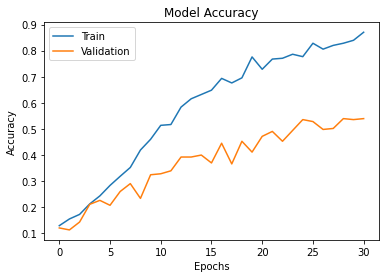

In [21]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [22]:
# Lưu lại
model.save("VNMoney.h5")

In [23]:
# Tải mô hình 
model_CNN=load_model('VNMoney.h5')

1/1 [==============================] - 0s 16ms/step
HAI CHUC NGAN DONG


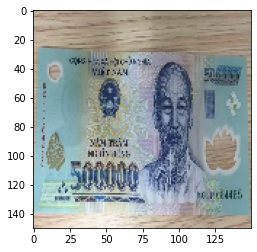

1/1 [==============================] - 0s 20ms/step
MOT NGAN DONG


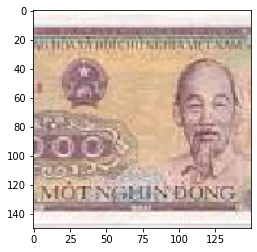

1/1 [==============================] - 0s 16ms/step
MOT TRAM NGAN DONG


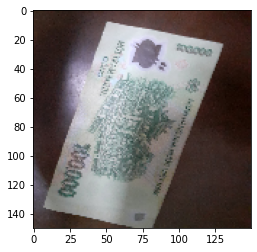

1/1 [==============================] - 0s 20ms/step
MUOI NGAN DONG


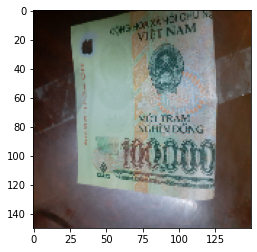

1/1 [==============================] - 0s 24ms/step
MUOI NGAN DONG


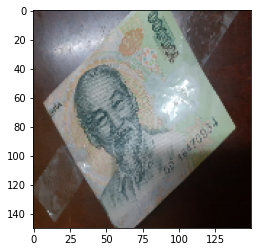

1/1 [==============================] - 0s 17ms/step
HAI CHUC NGAN DONG


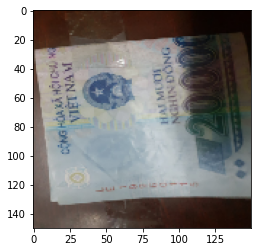

1/1 [==============================] - 0s 18ms/step
HAI CHUC NGAN DONG


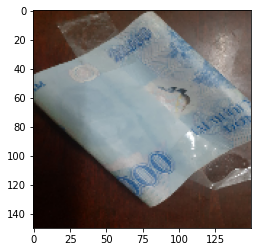

1/1 [==============================] - 0s 16ms/step
HAI CHUC NGAN DONG


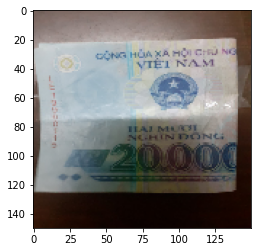

1/1 [==============================] - 0s 21ms/step
HAI CHUC NGAN DONG


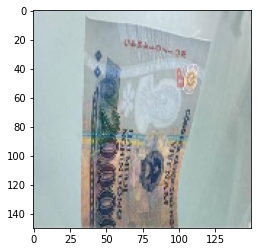

1/1 [==============================] - 0s 22ms/step
MUOI NGAN DONG


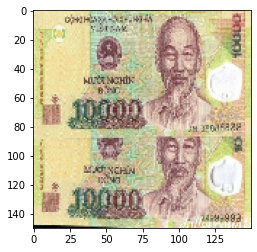

1/1 [==============================] - 0s 24ms/step
MUOI NGAN DONG


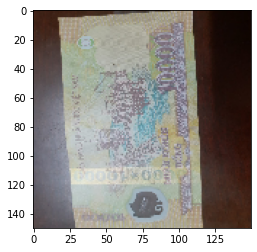

In [26]:
test="/content/drive/MyDrive/Colab_Notebooks/MONEY/TEST"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI TRAM DONG'
  if round(result[0][5])==1:
    prediction='HAI CHUC NGAN DONG'
  if round(result[0][6])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][7])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM TRAM DONG'
  if round(result[0][9])==1:
    prediction='NAM CHUC NGAN DONG'
  if round(result[0][9])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 
 # Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('VNMoney.ipynb')